In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

โหลด dataset ที่นี่ github TheEconomist/big-mac-data หรือ

https://github.com/TheEconomist/big-mac-data/blob/master/output-data/big-mac-adjusted-index.csv

In [61]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.928167,0.39739,0.16547,-0.06363,0.10547,0.96883
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29165.768649,2.317131,-0.28293,-0.40194,-0.51950,-0.43273,0.01031
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.873897,-0.05214,-0.20945,-0.36485,-0.25015,0.33548
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20976.720505,2.168026,0.49234,0.24466,0.00000,0.18059,1.10262
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.261079,-0.07587,-0.22924,-0.38075,-0.26892,0.30204


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1489 non-null   datetime64[ns]
 1   iso_a3         1489 non-null   object        
 2   currency_code  1489 non-null   object        
 3   name           1489 non-null   object        
 4   local_price    1489 non-null   float64       
 5   dollar_ex      1489 non-null   float64       
 6   dollar_price   1489 non-null   float64       
 7   GDP_bigmac     1489 non-null   float64       
 8   adj_price      1489 non-null   float64       
 9   USD            1489 non-null   float64       
 10  EUR            1489 non-null   float64       
 11  GBP            1489 non-null   float64       
 12  JPY            1489 non-null   float64       
 13  CNY            1489 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 163.0+ KB


In [63]:
# df=df[(df['date'].dt.year==2023)&(df['date'].dt.month==1)]

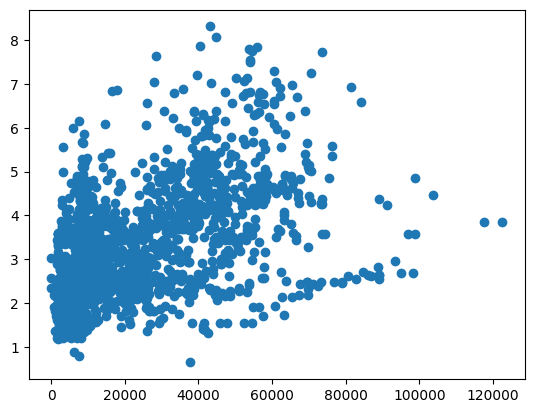

In [64]:
plt.scatter(x='GDP_bigmac', y='dollar_price', data=df)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
X = df[['GDP_bigmac']] #expect 2D array
y = df['dollar_price']

In [68]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #default 0.25 train 75 & test 25

In [69]:
model.fit(X,y)

LinearRegression()

In [70]:
model.score(X,y) #ค่า R-Squared

0.21540073413844385

In [71]:
model.intercept_ #จุดตัดแกน y

2.6542800665698216

In [72]:
model.coef_ #ค่าความชัน m

array([2.9051943e-05])

y = mx + c

In [73]:
model.coef_ * 9000 + model.intercept_

array([2.91574755])

In [74]:
model.predict([[9000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.91574755])

In [75]:
model.predict([[42500],[7500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.88898765, 2.87216964])

In [76]:
predic_Val = model.predict(X)

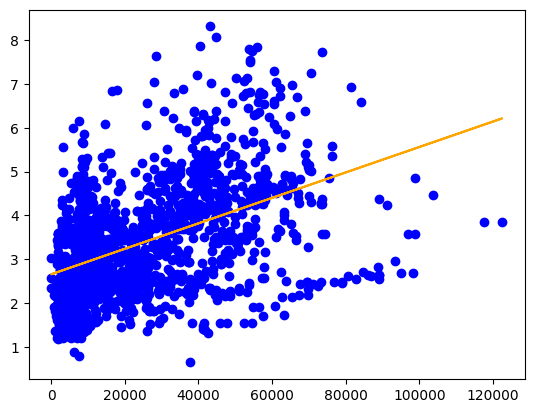

In [77]:
plt.scatter(X, y, color='blue')
plt.plot(X,predic_Val,color='orange')